<a href="https://colab.research.google.com/github/Narazura/Audio-Digital/blob/main/FeatureAudioExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libarary

In [ ]:
import warnings
import librosa as lb
import IPython.display as ipd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import librosa.display
%matplotlib inline

#Loading Audio File

In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
audio_path ={'music':[ '/content/drive/MyDrive/audio_wav/klasik1.wav','/content/drive/MyDrive/audio_wav/classic2.wav','/content/drive/MyDrive/audio_wav/rock 1.wav','/content/drive/MyDrive/audio_wav/rock2.wav'], 'speech':[]}
x = []
sr = []
for audio in audio_path:
  temp_x , temp_sr = librosa.load(audio_path['music'], duration = 30.0)
  x.append(temp_x)
  sr.append(temp_sr)

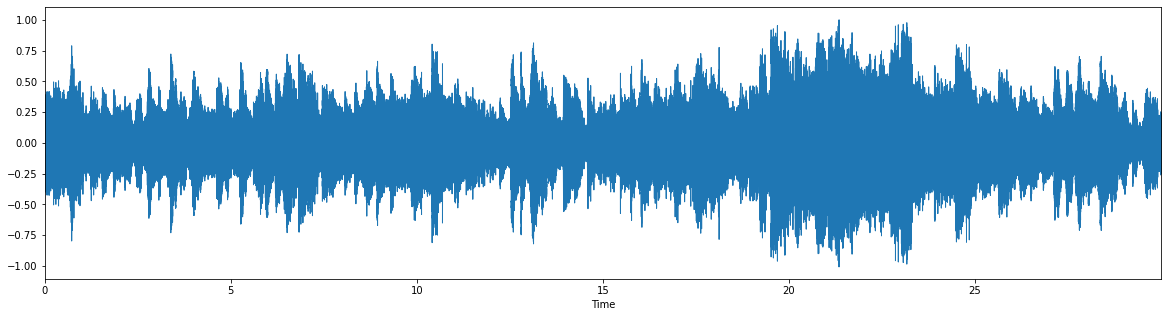

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

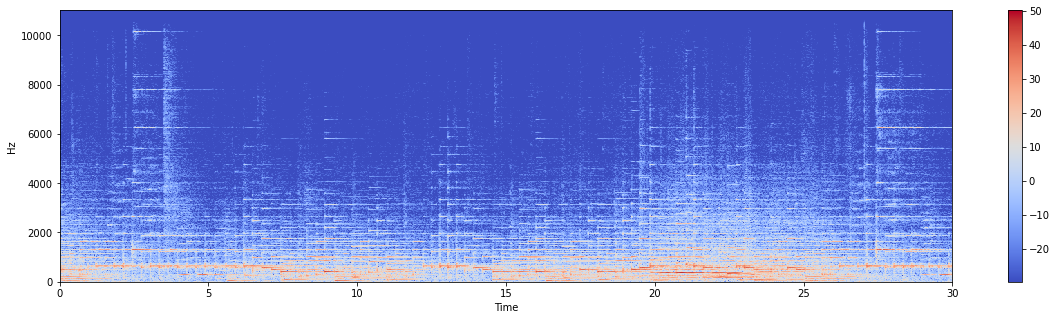

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

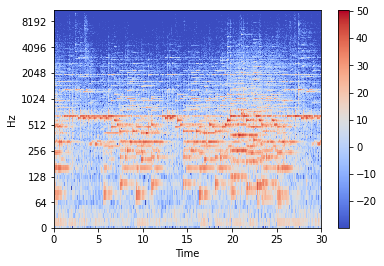

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
print('Vibration sequence:', x)  # Audio time series
array_len = x.shape
print('\nSound shape:', array_len)
print('Sample Rate (Hz):', sr)

# Length of the sound
print('Check Len of Audio:', array_len[0] / sr)

Vibration sequence: [ 0.21478066  0.2903149   0.20641313 ...  0.00135494 -0.00913138
 -0.02624945]

Sound shape: (661500,)
Sample Rate (Hz): 22050
Check Len of Audio: 30.0


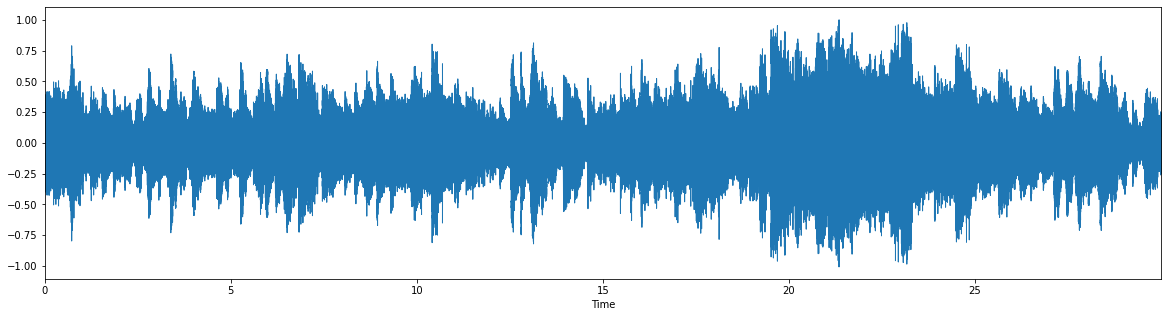

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

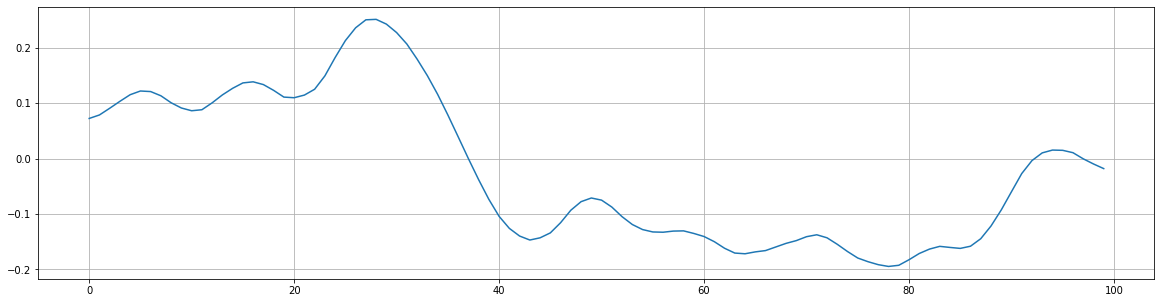

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(100,)

In [ ]:
print(sum(zero_crossings))

3


In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1292,)

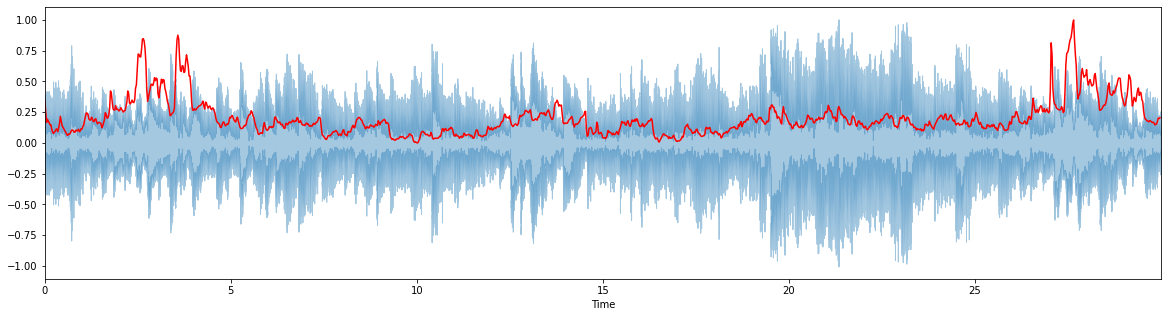

In [ ]:
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

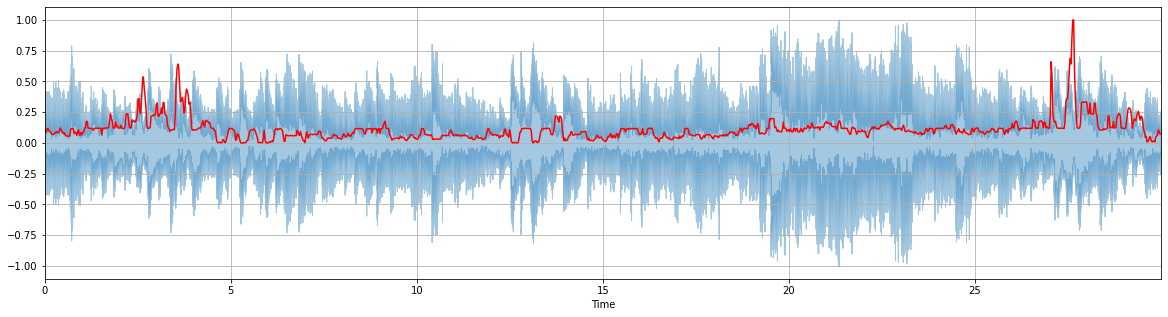

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

(20, 1292)


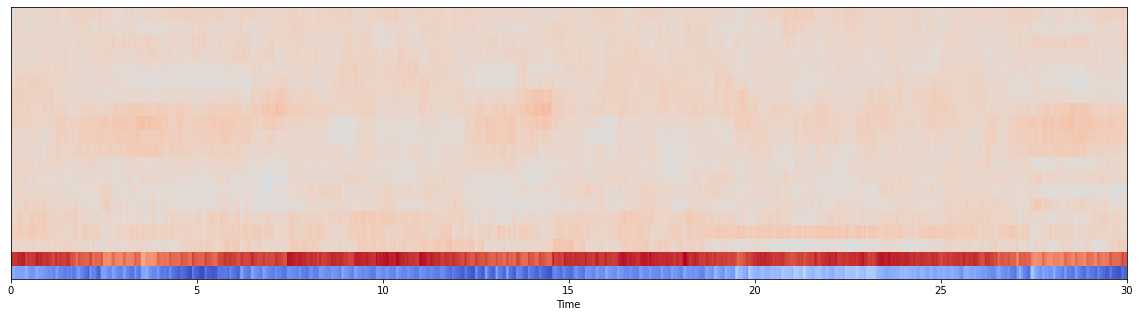

In [ ]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 0.0000000e+00 -1.1810208e-08 -1.1810208e-08  1.1810208e-08
  5.9051040e-09 -2.3620416e-08 -5.9051040e-09  0.0000000e+00
  1.7715312e-08  0.0000000e+00  2.3620416e-08  0.0000000e+00
 -5.9051040e-09 -1.1810208e-08  1.7715312e-08 -1.1810208e-08
  0.0000000e+00  8.8576559e-09  2.9525520e-09  4.4288280e-09]
[1.        1.        1.0000001 1.        1.        1.        1.
 1.        1.0000001 1.        1.        1.        1.        1.0000002
 0.9999999 1.        1.        1.0000001 1.0000001 1.       ]


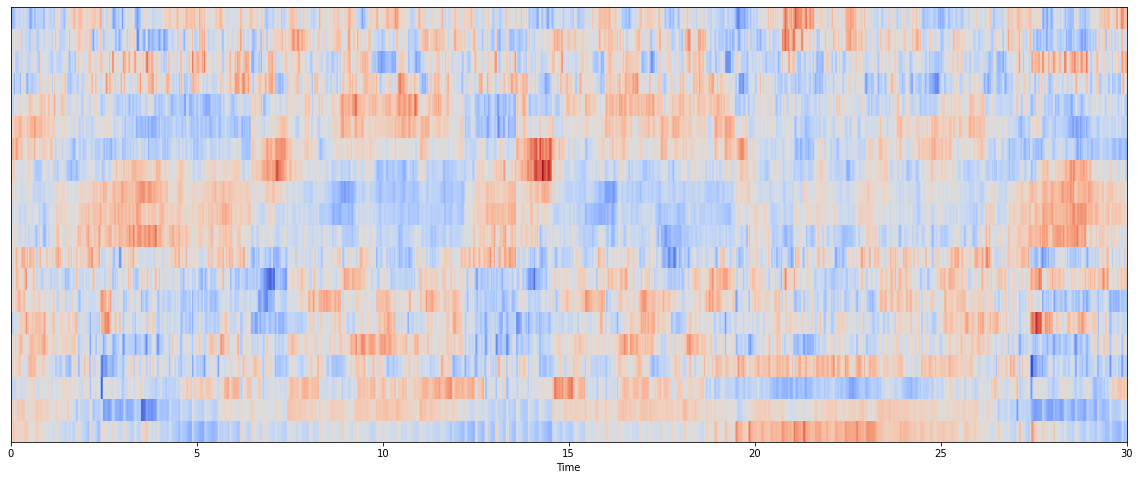

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

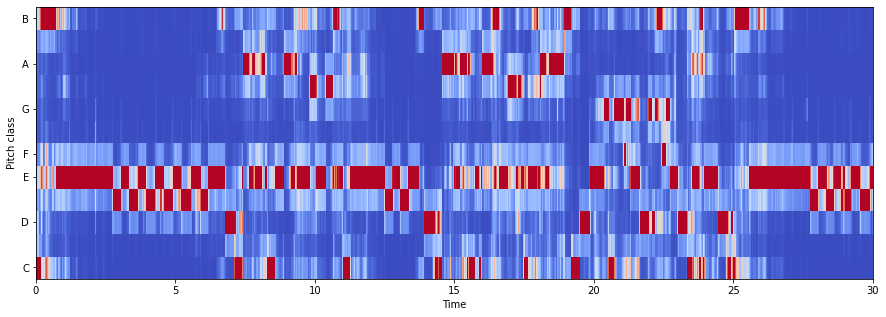

In [ ]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

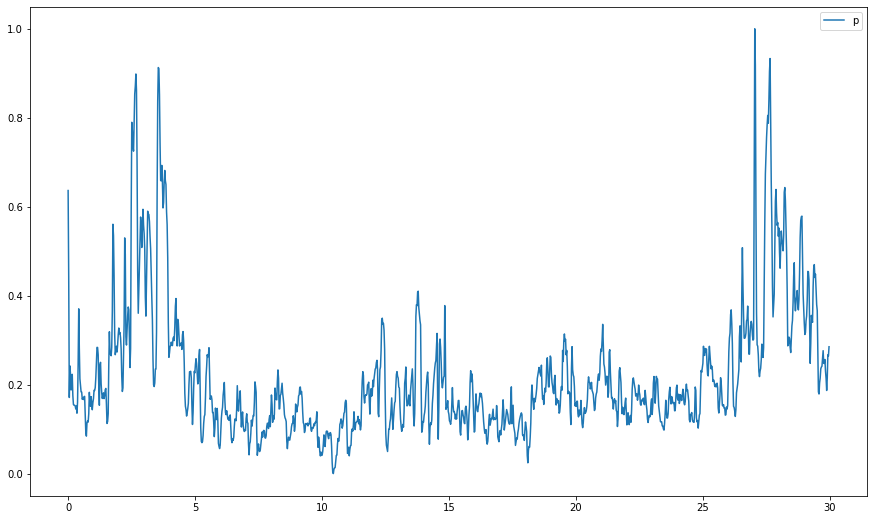

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
# spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
# spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
# librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2))
# plt.plot(t, normalize(spectral_bandwidth_3), color='g')
# plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2'))